# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [117]:
import pandas as pd

In [118]:
twitter_df = pd.read_csv('twitter-archive-enhanced.csv')
twitter_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [119]:
import requests

In [120]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
with open('image-predictions.tsv', mode='wb') as f:
    f.write(r.content)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [121]:
import tweepy
import json

In [ ]:
bearer_token = 'AAAAAAAAAAAAAAAAAAAAAMly7wAAAAAAWtZJZWC4bAi7VtmWP9GUIcET%2Bn4%3DuXWvv1EXQ07P1sO98Y1F7P5CHDFXVancgmsYM5BY2GBMi627iS'
auth = tweepy.OAuth2BearerHandler(bearer_token)
api = tweepy.API(auth)

In [ ]:
tweet_id_list = list(twitter_df.tweet_id)
deleted_tweet_ids = []
with open('Data/tweet_json.txt', mode='a') as f:
    for _id in tweet_id_list:
        try:
            tweet_json=api.get_status(_id)._json
            json.dump(tweet_json,f)
            f.write('\n')
            print(_id)
        except:
            deleted_tweet_ids.append(id)       

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [124]:
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [125]:
predictions_df = pd.read_csv('image-predictions.tsv', sep='\t')
predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [126]:
tweet_id_list = list(twitter_df.tweet_id)
tweets_list = []
with open('tweet-json.txt', mode='r') as f:
    for tweet_id in tweet_id_list:
        tweets_list.append(f.readline())
    
tweet_count_list = []
for tweet in tweets_list:
    if tweet!='':
        tweet_id = json.loads(tweet)['id']
        retweet_count = json.loads(tweet)['retweet_count']
        favorite_count = json.loads(tweet)['favorite_count']

        tweet_count_list.append({'tweet_id':tweet_id, 'retweet_count':retweet_count, 'favorite_count':favorite_count})
        
tweet_count_df = pd.DataFrame(tweet_count_list,columns = ['tweet_id', 'retweet_count', 'favorite_count'])
tweet_count_df.to_csv('tweet_count.csv', index=False)

In [127]:
count_df = pd.read_csv('tweet_count.csv')
count_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


### Quality issues
1. `Twitter Archive Table`: Incorrect datatype(tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)
2. `Twitter Archive Table`: Name, doggo, fluffer, pupper, puppo has None for NaN
3. `Twitter Archive Table`: Source contain html quotes
4. `Twitter Archive Table`: There are invalid dog name such as a, an etc.
5. `Twitter Archive Table`: Numerators are incorrectly recorded for decimal points
6. `Predictions Table`: Incorrect datatype(tweet_id, p1, p2, p3)
7. `Predictions Table`: Remove p1_dog, p2_dog, p3_dog set as False as these are not dog types
8. `Count Table`: Incorrect datatype(tweet_id)

### Tidiness issues
9. doggo, floofer, pupper, puppo should be in one column
10. Combine P1, P2, and P3 into prediction_type, and cofindence level columns
11. Join all three tables

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [128]:
# Make copies of original pieces of data
twitter_archive_df_clean = twitter_archive_df.copy()
predictions_df_clean = predictions_df.copy()
count_df_clean = count_df.copy()

### Issue #1: 
Incorrect datatype(tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)

#### Define:
1. Change the datatype for following columns:
    - tweet_id to string
    - in_reply_to_status_id to string
    - in_reply_to_user_id to string
    - timestamp to datetime
    - source to category
    - retweeted_status_id to string
    - retweeted_status_user_id to string
    - retweeted_status_timestamp to datetime
    

#### Code

In [129]:
twitter_archive_df_clean.tweet_id = twitter_archive_df_clean.tweet_id.astype(str)
twitter_archive_df_clean.in_reply_to_status_id = twitter_archive_df_clean.in_reply_to_status_id.astype(str)
twitter_archive_df_clean.in_reply_to_user_id = twitter_archive_df_clean.in_reply_to_user_id.astype(str)
twitter_archive_df_clean.source = twitter_archive_df_clean.source.astype('category')
twitter_archive_df_clean.timestamp = pd.to_datetime(twitter_archive_df_clean.timestamp)
twitter_archive_df_clean.retweeted_status_id = twitter_archive_df_clean.retweeted_status_id.astype(str)
twitter_archive_df_clean.retweeted_status_user_id = twitter_archive_df_clean.retweeted_status_user_id.astype(str)
twitter_archive_df_clean.retweeted_status_timestamp = pd.to_datetime(twitter_archive_df_clean.retweeted_status_timestamp)


#### Test

In [130]:
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null category
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: cat

### Issue #2: 
Name, doggo, fluffer, pupper, puppo has None for NaN

#### Define
2. Replace None with NaN in following columns:
    - name
    - doggo
    - fluffer
    - pupper
    - puppo

#### Code

In [131]:
import numpy as np
twitter_archive_df_clean.name = twitter_archive_df_clean.name.replace('None', np.nan)
twitter_archive_df_clean.doggo = twitter_archive_df_clean.doggo.replace('None', np.nan)
twitter_archive_df_clean.floofer = twitter_archive_df_clean.floofer.replace('None', np.nan)
twitter_archive_df_clean.pupper = twitter_archive_df_clean.pupper.replace('None', np.nan)
twitter_archive_df_clean.puppo = twitter_archive_df_clean.puppo.replace('None', np.nan)

#### Test

In [132]:
print(twitter_archive_df_clean[twitter_archive_df_clean.name=='None'])
print(twitter_archive_df_clean[twitter_archive_df_clean.doggo=='None'])
print(twitter_archive_df_clean[twitter_archive_df_clean.floofer=='None'])
print(twitter_archive_df_clean[twitter_archive_df_clean.pupper=='None'])
print(twitter_archive_df_clean[twitter_archive_df_clean.puppo=='None'])

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []
Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []
Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []
Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweete

### Issue #3:
Source contain html quotes

#### Define:
3. Remove html tags from source column

#### Code

In [133]:
twitter_archive_df_clean.source = twitter_archive_df_clean.source.str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">','')
twitter_archive_df_clean.source = twitter_archive_df_clean.source.str.replace('<a href="http://vine.co" rel="nofollow">','')
twitter_archive_df_clean.source = twitter_archive_df_clean.source.str.replace('<a href="http://twitter.com" rel="nofollow">','')
twitter_archive_df_clean.source = twitter_archive_df_clean.source.str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">','')
twitter_archive_df_clean.source = twitter_archive_df_clean.source.str.replace('</a>','')

#### Test

In [134]:
twitter_archive_df_clean.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

### Issue #4:
There are invalid dog name such as a, an etc.

#### Define:
4. Delete rows having incorrect dog names i.e. dog names starting with a lowercase and NaN/None

#### Code

In [135]:
twitter_archive_df_clean = twitter_archive_df_clean.dropna(subset=['name'])
twitter_archive_df_clean.name = twitter_archive_df_clean[twitter_archive_df_clean.name.str[0].str.isupper()].name

#### Test

In [136]:
twitter_archive_df_clean.name.value_counts()

Charlie         12
Cooper          11
Oliver          11
Lucy            11
Tucker          10
Lola            10
Penny           10
Bo               9
Winston          9
Sadie            8
Daisy            7
Toby             7
Buddy            7
Bailey           7
Dave             6
Koda             6
Jack             6
Leo              6
Stanley          6
Oscar            6
Milo             6
Bella            6
Rusty            6
Jax              6
Scout            6
Alfie            5
Louis            5
Sammy            5
Larry            5
Sunny            5
                ..
Beya             1
Clifford         1
Jaspers          1
Lizzie           1
Comet            1
Herb             1
Brooks           1
Deacon           1
Bowie            1
Stuart           1
Mookie           1
Ferg             1
Brudge           1
Alexander        1
Juckson          1
Mike             1
Cheryl           1
Cleopatricia     1
Rambo            1
Autumn           1
Sailer           1
Glacier     

### Issue #5:
Numerators are incorrectly recorded for decimal points

#### Define:
5. Fix rating_numerator and rating_denominator as 4 tweets has taken numerator from rating after decimal point

#### Code

In [137]:
value_df = twitter_archive_df_clean.loc[twitter_archive_df_clean.text.str.contains('(\d+\.\d+\/)'), 'text'].str.extract('(\d+\.\d+)')
value_df

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,0
45,13.5
340,9.75
695,9.75
763,11.27


In [138]:
twitter_archive_df_clean.at[45,'rating_numerator']=float(value_df.loc[45][0])
twitter_archive_df_clean.at[340, 'rating_numerator']=float(value_df.loc[340][0])
twitter_archive_df_clean.at[695, 'rating_numerator']=float(value_df.loc[695][0])
twitter_archive_df_clean.at[763, 'rating_numerator']=float(value_df.loc[763][0])

#### Test

In [139]:
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1611 entries, 0 to 2354
Data columns (total 17 columns):
tweet_id                      1611 non-null object
in_reply_to_status_id         1611 non-null object
in_reply_to_user_id           1611 non-null object
timestamp                     1611 non-null datetime64[ns]
source                        1611 non-null object
text                          1611 non-null object
retweeted_status_id           1611 non-null object
retweeted_status_user_id      1611 non-null object
retweeted_status_timestamp    116 non-null datetime64[ns]
expanded_urls                 1611 non-null object
rating_numerator              1611 non-null int64
rating_denominator            1611 non-null int64
name                          1502 non-null object
doggo                         53 non-null object
floofer                       5 non-null object
pupper                        148 non-null object
puppo                         20 non-null object
dtypes: datetime64[ns

In [140]:
print(twitter_archive_df_clean.loc[45].rating_numerator)
print(twitter_archive_df_clean.loc[340].rating_numerator)
print(twitter_archive_df_clean.loc[695].rating_numerator)
print(twitter_archive_df_clean.loc[763].rating_numerator)

13
9
9
11


### Issue #6:
Incorrect datatype(tweet_id, p1, p2, p3)

#### Define:
6. Change the datatype for following columns:
    - tweet_id to string
    - p1 to category
    - p2 to category
    - p3 to category
    - p1_dog to boolean
    - p2_dog to boolean
    - p3_dog to boolean

#### Code

In [141]:
predictions_df_clean.tweet_id = predictions_df_clean.tweet_id.astype(str)
predictions_df_clean.p1 = predictions_df_clean.p1.astype('category')
predictions_df_clean.p2 = predictions_df_clean.p2.astype('category')
predictions_df_clean.p3 = predictions_df_clean.p3.astype('category')
predictions_df_clean.p1_dog = predictions_df_clean.p1_dog.astype(bool)
predictions_df_clean.p2_dog = predictions_df_clean.p2_dog.astype(bool)
predictions_df_clean.p3_dog = predictions_df_clean.p3_dog.astype(bool)

#### Test

In [142]:
predictions_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null category
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null category
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null category
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), category(3), float64(3), int64(1), object(2)
memory usage: 174.9+ KB


### Issue #7:
Remove p1_dog, p2_dog, p3_dog set as False as these are not dog types

#### Define:
7. Remove p1_dog, p2_dog, p3_dog set as False as these are not dog types

#### Code

In [143]:
predictions_df_clean = predictions_df_clean[predictions_df_clean.p1_dog]
predictions_df_clean = predictions_df_clean[predictions_df_clean.p2_dog]
predictions_df_clean = predictions_df_clean[predictions_df_clean.p3_dog]

#### Test

In [144]:
set(predictions_df_clean.p1)

{'Afghan_hound',
 'Airedale',
 'American_Staffordshire_terrier',
 'Appenzeller',
 'Australian_terrier',
 'Bedlington_terrier',
 'Bernese_mountain_dog',
 'Blenheim_spaniel',
 'Border_collie',
 'Border_terrier',
 'Boston_bull',
 'Brabancon_griffon',
 'Brittany_spaniel',
 'Cardigan',
 'Chesapeake_Bay_retriever',
 'Chihuahua',
 'Dandie_Dinmont',
 'Doberman',
 'English_setter',
 'English_springer',
 'EntleBucher',
 'Eskimo_dog',
 'French_bulldog',
 'German_shepherd',
 'German_short-haired_pointer',
 'Gordon_setter',
 'Great_Dane',
 'Great_Pyrenees',
 'Greater_Swiss_Mountain_dog',
 'Ibizan_hound',
 'Irish_setter',
 'Irish_terrier',
 'Irish_water_spaniel',
 'Italian_greyhound',
 'Japanese_spaniel',
 'Labrador_retriever',
 'Lakeland_terrier',
 'Leonberg',
 'Lhasa',
 'Maltese_dog',
 'Mexican_hairless',
 'Newfoundland',
 'Norfolk_terrier',
 'Norwegian_elkhound',
 'Norwich_terrier',
 'Old_English_sheepdog',
 'Pekinese',
 'Pembroke',
 'Pomeranian',
 'Rhodesian_ridgeback',
 'Rottweiler',
 'Saint_Be

In [145]:
set(predictions_df_clean.p2)

{'Afghan_hound',
 'Airedale',
 'American_Staffordshire_terrier',
 'Appenzeller',
 'Australian_terrier',
 'Bedlington_terrier',
 'Blenheim_spaniel',
 'Border_collie',
 'Border_terrier',
 'Boston_bull',
 'Brabancon_griffon',
 'Brittany_spaniel',
 'Cardigan',
 'Chesapeake_Bay_retriever',
 'Chihuahua',
 'Dandie_Dinmont',
 'Doberman',
 'English_foxhound',
 'English_setter',
 'English_springer',
 'EntleBucher',
 'Eskimo_dog',
 'French_bulldog',
 'German_shepherd',
 'German_short-haired_pointer',
 'Great_Dane',
 'Great_Pyrenees',
 'Greater_Swiss_Mountain_dog',
 'Ibizan_hound',
 'Irish_setter',
 'Irish_terrier',
 'Irish_wolfhound',
 'Italian_greyhound',
 'Japanese_spaniel',
 'Kerry_blue_terrier',
 'Labrador_retriever',
 'Lakeland_terrier',
 'Leonberg',
 'Lhasa',
 'Maltese_dog',
 'Mexican_hairless',
 'Newfoundland',
 'Norfolk_terrier',
 'Norwegian_elkhound',
 'Norwich_terrier',
 'Old_English_sheepdog',
 'Pekinese',
 'Pembroke',
 'Pomeranian',
 'Rhodesian_ridgeback',
 'Rottweiler',
 'Saint_Berna

In [146]:
set(predictions_df_clean.p3)

{'Afghan_hound',
 'Airedale',
 'American_Staffordshire_terrier',
 'Appenzeller',
 'Australian_terrier',
 'Bernese_mountain_dog',
 'Blenheim_spaniel',
 'Border_collie',
 'Border_terrier',
 'Boston_bull',
 'Bouvier_des_Flandres',
 'Brabancon_griffon',
 'Brittany_spaniel',
 'Cardigan',
 'Chesapeake_Bay_retriever',
 'Chihuahua',
 'Dandie_Dinmont',
 'Doberman',
 'English_foxhound',
 'English_setter',
 'English_springer',
 'EntleBucher',
 'Eskimo_dog',
 'French_bulldog',
 'German_shepherd',
 'German_short-haired_pointer',
 'Gordon_setter',
 'Great_Dane',
 'Great_Pyrenees',
 'Greater_Swiss_Mountain_dog',
 'Ibizan_hound',
 'Irish_setter',
 'Irish_terrier',
 'Irish_water_spaniel',
 'Irish_wolfhound',
 'Italian_greyhound',
 'Japanese_spaniel',
 'Kerry_blue_terrier',
 'Labrador_retriever',
 'Lakeland_terrier',
 'Leonberg',
 'Lhasa',
 'Maltese_dog',
 'Mexican_hairless',
 'Newfoundland',
 'Norfolk_terrier',
 'Norwegian_elkhound',
 'Norwich_terrier',
 'Old_English_sheepdog',
 'Pekinese',
 'Pembroke'

### Issue #7:
 Incorrect datatype(tweet_id)

#### Define:
8. Incorrect datatype(tweet_id)

#### Code

In [147]:
count_df_clean.tweet_id = count_df_clean.tweet_id.astype(str)

#### Test

In [148]:
count_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


### Issue #9:
doggo, floofer, pupper, puppo should be in one column

#### Define:
9. doggo, floofer, pupper, puppo should be in one column called dog_stage

#### Code

In [149]:
twitter_archive_df_clean = pd.melt(twitter_archive_df_clean,
                                  id_vars=['tweet_id',
                                           'in_reply_to_status_id',
                                           'in_reply_to_user_id',
                                           'timestamp',
                                           'source',
                                           'text',
                                           'retweeted_status_id',
                                           'retweeted_status_user_id',
                                           'retweeted_status_timestamp',
                                           'expanded_urls',
                                           'rating_numerator',
                                           'rating_denominator',
                                           'name'],
                                   value_vars=['doggo', 'floofer', 'pupper', 'puppo'],
                                   var_name='dog_stages',
                                   value_name='dog_stage'
                                  )
twitter_archive_df_clean=twitter_archive_df_clean.drop('dog_stages',1)

#### Test

In [150]:
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6444 entries, 0 to 6443
Data columns (total 14 columns):
tweet_id                      6444 non-null object
in_reply_to_status_id         6444 non-null object
in_reply_to_user_id           6444 non-null object
timestamp                     6444 non-null datetime64[ns]
source                        6444 non-null object
text                          6444 non-null object
retweeted_status_id           6444 non-null object
retweeted_status_user_id      6444 non-null object
retweeted_status_timestamp    464 non-null datetime64[ns]
expanded_urls                 6444 non-null object
rating_numerator              6444 non-null int64
rating_denominator            6444 non-null int64
name                          6008 non-null object
dog_stage                     226 non-null object
dtypes: datetime64[ns](2), int64(2), object(10)
memory usage: 704.9+ KB


### Issue #10:
Combine P1, P2, and P3 into prediction_type, and cofindence level columns

#### Define:
10. Combine P1, P2, and P3 into prediction_type, and cofindence level columns

#### Code

In [151]:
dog_type_prediction_list = []
prediction_confidence_list = []

def combine_prediction_confidence(df):
    if df['p1_dog']:
        dog_type_prediction_list.append(df['p1'])
        prediction_confidence_list.append(df['p1_conf'])
    elif df['p2_dog']:
        dog_type_prediction_list.append(df['p2'])
        prediction_confidence_list.append(df['p2_conf'])
    elif df['p3_dog']:
        dog_type_prediction_list.append(df['p3'])
        prediction_confidence_list.append(df['p3_conf'])
    else:
        dog_type_prediction_list.append(np.nan)
        prediction_confidence_list.append(np.nan)
        
predictions_df_clean.apply(combine_prediction_confidence,axis=1)
predictions_df_clean['dog_type_prediction']=dog_type_prediction_list
predictions_df_clean['prediction_confidence']=prediction_confidence_list
predictions_df_clean=predictions_df_clean.drop(['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],axis=1)

#### Test

In [152]:
predictions_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1243 entries, 0 to 2073
Data columns (total 5 columns):
tweet_id                 1243 non-null object
jpg_url                  1243 non-null object
img_num                  1243 non-null int64
dog_type_prediction      1243 non-null object
prediction_confidence    1243 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 58.3+ KB


### Issue #11:
Join all three tables

#### Define
11. Join twitter_archive_df_clean, predictions_df_clean and count_df_clean 

#### Code

In [153]:
twitter_archive_master = pd.merge(twitter_archive_df_clean, predictions_df_clean,
                                 on=['tweet_id'], how='left')
twitter_archive_master = pd.merge(twitter_archive_master, count_df_clean,
                                 on=['tweet_id'], how='left')

twitter_archive_master.retweet_count = twitter_archive_master.retweet_count.fillna(0)
twitter_archive_master.retweet_count = twitter_archive_master.retweet_count.astype(int)
twitter_archive_master.favorite_count = twitter_archive_master.favorite_count.fillna(0)
twitter_archive_master.favorite_count = twitter_archive_master.favorite_count.astype(int)

twitter_archive_master=twitter_archive_master.drop_duplicates()

#### Test

In [154]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1837 entries, 0 to 5619
Data columns (total 20 columns):
tweet_id                      1837 non-null object
in_reply_to_status_id         1837 non-null object
in_reply_to_user_id           1837 non-null object
timestamp                     1837 non-null datetime64[ns]
source                        1837 non-null object
text                          1837 non-null object
retweeted_status_id           1837 non-null object
retweeted_status_user_id      1837 non-null object
retweeted_status_timestamp    139 non-null datetime64[ns]
expanded_urls                 1837 non-null object
rating_numerator              1837 non-null int64
rating_denominator            1837 non-null int64
name                          1710 non-null object
dog_stage                     226 non-null object
jpg_url                       1061 non-null object
img_num                       1061 non-null float64
dog_type_prediction           1061 non-null object
prediction_co

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [155]:
twitter_archive_master.to_csv('twitter-archive-master.csv', index=False)

In [156]:
twitter_archive_master = pd.read_csv('twitter-archive-master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [157]:
import matplotlib.pyplot as plt

### Insights:
1. Tweet Sources: More than 95% of the users are using twitter for iphone
2. 65% of the tweets are about dogs in pupper stage
3. More than 25% of the tweets are abot Top 5 most popular dogs combined

### 1. Tweet Sources: More than 95% of the users are using twitter for iphone

0.95427327163854114

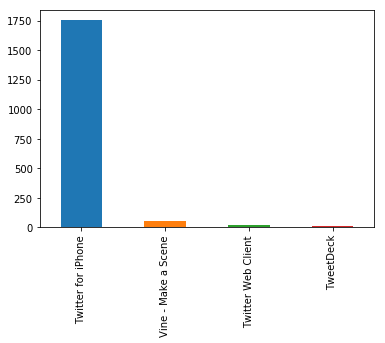

In [158]:
twitter_archive_master.source.value_counts().plot(kind = 'bar')
twitter_archive_master.source.value_counts()['Twitter for iPhone']/twitter_archive_master.source.count()

### 2. Dog stage: 65% of the tweets are about dogs in pupper stage

0.65486725663716816

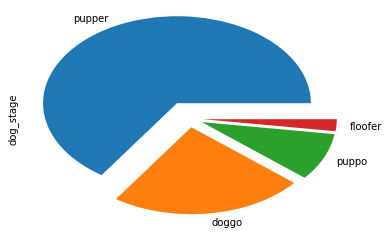

In [159]:
explode = (0.2, 0.1, 0.1, 0.1) 
twitter_archive_master.dog_stage.value_counts().plot(kind = 'pie', explode=explode)
twitter_archive_master.dog_stage.value_counts()['pupper']/twitter_archive_master.dog_stage.count()

### 3. Dog Types: More than 25% of the tweets are abot Top 5 most popular dogs combined  

0.28463713477851083

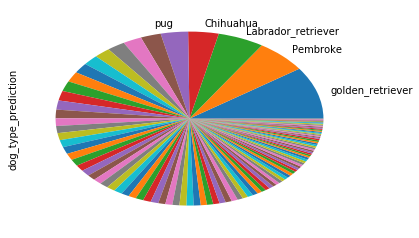

In [160]:
labels = np.full(len(twitter_archive_master.dog_type_prediction.value_counts()), "", dtype=object)
labels[0]='golden_retriever'
labels[1]='Pembroke'
labels[2]='Labrador_retriever'
labels[3]='Chihuahua'
labels[4]='pug'
twitter_archive_master.dog_type_prediction.value_counts().plot(kind = 'pie', labels=labels)


((twitter_archive_master.dog_type_prediction.value_counts()['golden_retriever']+
 twitter_archive_master.dog_type_prediction.value_counts()['Pembroke']+
 twitter_archive_master.dog_type_prediction.value_counts()['Labrador_retriever']+
 twitter_archive_master.dog_type_prediction.value_counts()['Chihuahua']+
 twitter_archive_master.dog_type_prediction.value_counts()['pug'])
 / twitter_archive_master.dog_type_prediction.count())

### Visualization

In [181]:
twitter_archive_master[twitter_archive_master.rating_numerator<200]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,dog_type_prediction,prediction_confidence,retweet_count,favorite_count
0,892420643555336193,nan,nan,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,NaN,8853,39467
1,892177421306343426,nan,nan,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,nan,nan,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,6514,33819
2,891815181378084864,nan,nan,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,4328,25461
3,891689557279858688,nan,nan,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,nan,nan,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN,NaN,8964,42908
4,891327558926688256,nan,nan,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,nan,nan,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,9774,41048
5,890971913173991426,nan,nan,2017-07-28 16:27:12+00:00,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,nan,nan,NaT,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,NaN,NaN,NaN,NaN,2158,12041
6,890609185150312448,nan,nan,2017-07-27 16:25:51+00:00,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,nan,nan,NaT,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1.0,Irish_terrier,0.487574,4429,28226
7,890240255349198849,nan,nan,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,nan,nan,NaT,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1.0,Pembroke,0.511319,7711,32467
8,890006608113172480,nan,nan,2017-07-26 00:31:25+00:00,Twitter for iPhone,This is Koda. He is a South Australian decksha...,nan,nan,NaT,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,NaN,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1.0,Samoyed,0.957979,7624,31166
9,889880896479866881,nan,nan,2017-07-25 16:11:53+00:00,Twitter for iPhone,This is Bruno. He is a service shark. Only get...,nan,nan,NaT,https://twitter.com/dog_rates/status/889880896...,13,10,Bruno,NaN,NaN,NaN,NaN,NaN,5156,28268


Text(0,0.5,'Favorite Count')

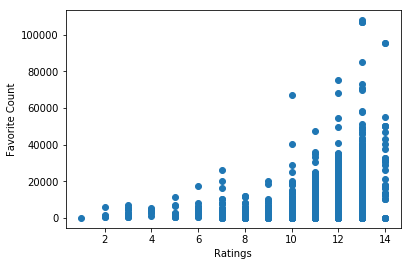

In [184]:
plt.scatter(twitter_archive_master[twitter_archive_master.rating_numerator<=20].rating_numerator,twitter_archive_master[twitter_archive_master.rating_numerator<20].favorite_count)
plt.xlabel('Ratings')
plt.ylabel('Favorite Count')